<a href="https://colab.research.google.com/github/sjkchang/CMPE255-Assignment-2/blob/master/notebooks/Assignment2_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pycaret Setup


In [ ]:
!pip install pycaret
!pip install pycaret[mlops]

In [3]:
# check installed version
import pycaret
pycaret.__version__

'3.0.4'

In [4]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Colab Notebooks/Datasets/255-Datasets
%ls

Mounted at /content/drive
/content/drive/MyDrive/Colab Notebooks/Datasets/255-Datasets
 3D-Print-Anomoly-Detection/
 Amazon-stock-time-series.csv
 CarPrice_Assignment.csv
'Credit Card Customer Data - Clustering.csv'
 falling-elders-anomoly-detection/
 flagged/
 Groceries_dataset-association-rules-mining.csv
 heartattack.csv
 logs.log
 my_first_pipeline.pkl
 secondhand-car-price-regression.csv


# Heart Disease - Classification

In [5]:
from pycaret.datasets import get_data
data = get_data('heartattack')

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative




The dataset contains several columns, with the "class" column being our target variable that indicates whether a person is positive or negative for heart disease. Here's a brief description of each column:



```
age: Age of the person.
gender: Gender of the person (1 or 0).
impulse: Could be representing some kind of impulse reading (requires clarification).
pressurehight: Possibly representing the higher range of blood pressure measurement.
pressurelow: Possibly representing the lower range of blood pressure measurement.
glucose: Glucose level in the blood.
kcm: Not clear what this column represents (requires clarification).
troponin: A protein that is released into the bloodstream during a heart attack.
class: The target variable indicating whether the person is positive or negative for heart disease.
```





In [8]:
train = data.sample(frac=0.7, random_state=200)
test = data.drop(train.index)


In [11]:
from pycaret.classification import *
heart_class = setup(train, target = 'class', session_id=999, use_gpu=True)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

,Description,Value
0,Session id,999
1,Target,class
2,Target type,Binary
3,Target mapping,"negative: 0, positive: 1"
4,Original data shape,"(923, 9)"
5,Transformed data shape,"(923, 9)"
6,Transformed train set shape,"(646, 9)"
7,Transformed test set shape,"(277, 9)"
8,Numeric features,8
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 1, number of negative: 1
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset migh

**Compare Models**

In [12]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9938,0.9934,0.9951,0.9951,0.9950,0.9868,0.9870,0.0780
gbc,Gradient Boosting Classifier,0.9938,0.9999,0.9951,0.9951,0.9950,0.9868,0.9870,0.4850
ada,Ada Boost Classifier,0.9923,0.9976,0.9976,0.9904,0.9939,0.9834,0.9837,0.4020
lightgbm,Light Gradient Boosting Machine,0.9907,0.9998,0.9926,0.9928,0.9926,0.9803,0.9807,0.1560
rf,Random Forest Classifier,0.9876,0.9997,0.9827,0.9976,0.9900,0.9738,0.9743,0.7770
qda,Quadratic Discriminant Analysis,0.9334,0.9921,0.8959,0.9974,0.9433,0.8633,0.8718,0.1260
nb,Naive Bayes,0.9101,0.9900,0.8587,0.9973,0.9218,0.8178,0.8322,0.0760
et,Extra Trees Classifier,0.8948,0.9605,0.9059,0.9249,0.9149,0.7771,0.7784,0.9860
lr,Logistic Regression,0.8081,0.8962,0.8412,0.8533,0.8461,0.5904,0.5932,0.1070
lda,Linear Discriminant Analysis,0.7151,0.7714,0.8634,0.7294,0.7905,0.3543,0.3687,0.1070


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

**Analyze Model**

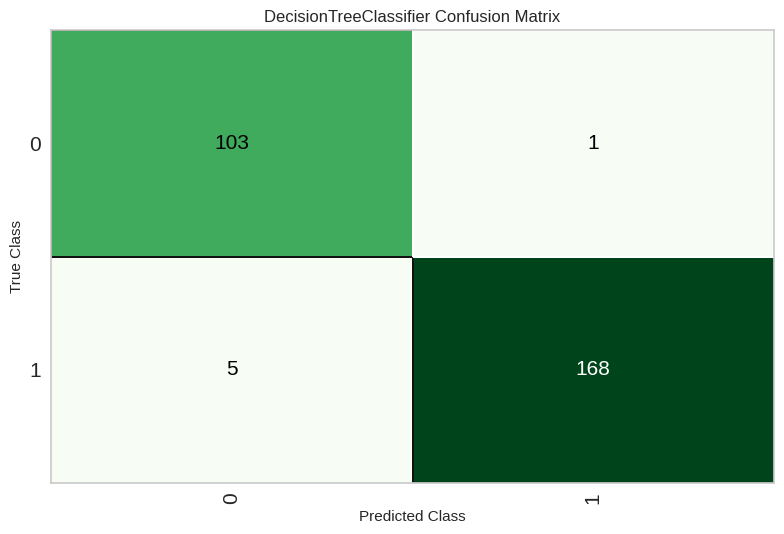

In [13]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

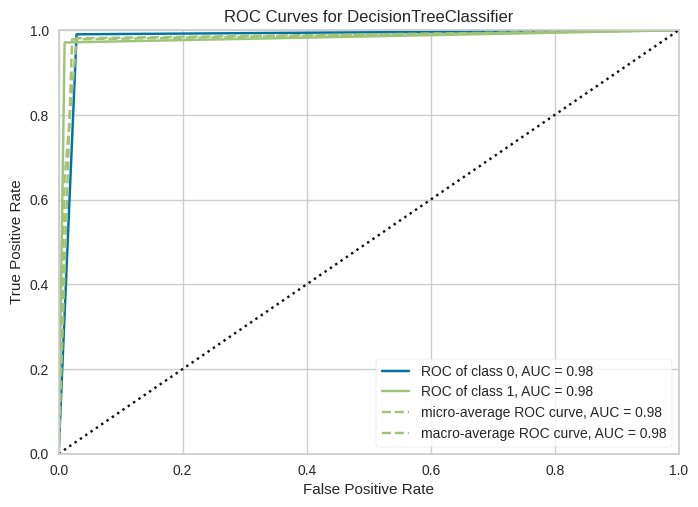

In [14]:
# plot AUC
plot_model(best, plot = 'auc')

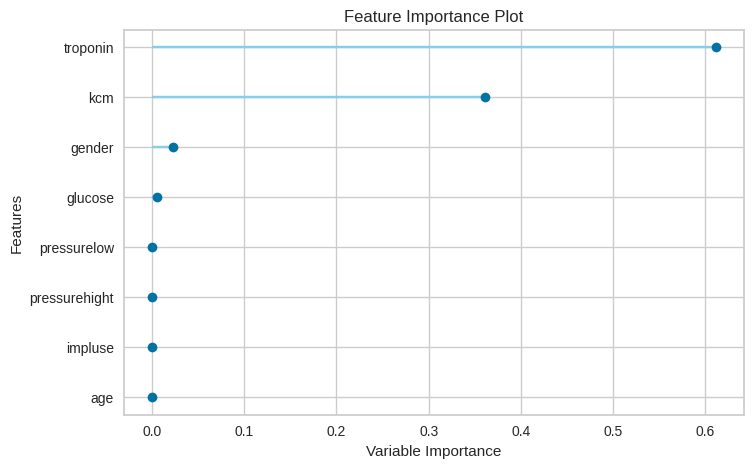

In [15]:
# plot feature importance
plot_model(best, plot = 'feature')

**Prediction**

In [16]:
holdout_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9783,0.9807,0.9711,0.9941,0.9825,0.9542,0.9546


In [18]:
test.drop('class', axis=1, inplace=True)
test.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin
0,64,1,66,160,83,160.0,1.80,0.012
10,44,0,60,166,90,102.0,2.39,0.006
11,63,0,60,150,83,198.0,2.39,0.013
12,64,1,60,199,99,92.0,3.43,5.370
15,61,1,81,118,66,134.0,1.49,0.017


The dataset contains several columns, with the "class" column being our target variable that indicates whether a person is positive or negative for heart disease. Here's a brief description of each column:

    age: Age of the person.
    gender: Gender of the person (1 or 0).
    impulse: Could be representing some kind of impulse reading (requires clarification).
    pressurehight: Possibly representing the higher range of blood pressure measurement.
    pressurelow: Possibly representing the lower range of blood pressure measurement.
    glucose: Glucose level in the blood.
    kcm: Not clear what this column represents (requires clarification).
    troponin: A protein that is released into the bloodstream during a heart attack.
    class: The target variable indicating whether the person is positive or negative for heart disease.

In [19]:
predictions = predict_model(best, data = test)
predictions.head()

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,prediction_label,prediction_score
0,64,1,66,160,83,160.0,1.80,0.012,negative,1.0
10,44,0,60,166,90,102.0,2.39,0.006,negative,1.0
11,63,0,60,150,83,198.0,2.39,0.013,negative,1.0
12,64,1,60,199,99,92.0,3.43,5.370,positive,1.0
15,61,1,81,118,66,134.0,1.49,0.017,positive,1.0


In [14]:
create_app(best)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>